In [1]:
import pandas as pd 
from pandas import Series
import numpy as np 
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot  
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson


from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 

import pmdarima as pm
from pmdarima import auto_arima 
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import nsdiffs
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn import datasets

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
#Importing data
Beijing = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/BeijingPM20100101_20151231.csv")

In [3]:
#Delet non-useful data
Beijing.drop(['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'season', 'precipitation', 'Iprec'], 
               axis=1,
              inplace=True)
#Beijing.sum()

In [4]:
Beijing.dropna(axis=0, how="any",inplace=True)

In [5]:
# from datetime import datetime
Beijing['Time'] = pd.to_datetime(Beijing['year'].map(str) +"/"+ Beijing['month'].map(str) +"/"+ Beijing['day'].map(str)+" "+Beijing['hour'].map(str)+":00:00")
#Beijing

In [6]:
#Beijing.groupby(['year']).size()

In [7]:
by_hour = Beijing.groupby(['Time']).mean()
#by_hour

In [8]:
by_hour.index = pd.to_datetime(by_hour.index, 
                             format='%d-%m-%Y %H:%M:%S')
by_hour = by_hour.set_index(by_hour.index).asfreq('H')
by_hour = by_hour.fillna(method='ffill')
#by_hour.index

In [23]:
by_hour['Time'] = by_hour.index
by_hour

,No,year,month,day,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,Time
Time,,,,,,,,,,,,
2010-01-01 23:00:00,24.0,2010.0,1.0,1.0,23.0,129.0,-17.0,41.0,1020.0,-5.0,0.89,2010-01-01 23:00:00
2010-01-02 00:00:00,25.0,2010.0,1.0,2.0,0.0,148.0,-16.0,38.0,1020.0,-4.0,1.79,2010-01-02 00:00:00
2010-01-02 01:00:00,26.0,2010.0,1.0,2.0,1.0,159.0,-15.0,42.0,1020.0,-4.0,2.68,2010-01-02 01:00:00
2010-01-02 02:00:00,27.0,2010.0,1.0,2.0,2.0,181.0,-11.0,63.5,1021.0,-5.0,3.57,2010-01-02 02:00:00
2010-01-02 03:00:00,28.0,2010.0,1.0,2.0,3.0,138.0,-7.0,85.0,1022.0,-5.0,5.36,2010-01-02 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,52580.0,2015.0,12.0,31.0,19.0,133.0,-8.0,68.0,1031.0,-3.0,7.14,2015-12-31 19:00:00
2015-12-31 20:00:00,52581.0,2015.0,12.0,31.0,20.0,169.0,-8.0,63.0,1030.0,-2.0,8.03,2015-12-31 20:00:00
2015-12-31 21:00:00,52582.0,2015.0,12.0,31.0,21.0,203.0,-10.0,73.0,1030.0,-6.0,0.89,2015-12-31 21:00:00


In [41]:
data_13 = by_hour[(by_hour['Time'] >=pd.to_datetime('20130101000000')) & (by_hour['Time'] <= pd.to_datetime('20140101000000'))]

In [42]:
data_13

,No,year,month,day,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,Time
Time,,,,,,,,,,,,
2013-01-01 00:00:00,26305.0,2013.0,1.0,1.0,0.0,31.0,-10.0,67.0,1018.0,-5.0,5.81,2013-01-01 00:00:00
2013-01-01 01:00:00,26306.0,2013.0,1.0,1.0,1.0,32.0,-11.0,73.0,1017.0,-7.0,9.83,2013-01-01 01:00:00
2013-01-01 02:00:00,26307.0,2013.0,1.0,1.0,2.0,21.0,-11.0,73.0,1017.0,-7.0,11.62,2013-01-01 02:00:00
2013-01-01 03:00:00,26308.0,2013.0,1.0,1.0,3.0,16.0,-14.0,72.0,1018.0,-10.0,14.75,2013-01-01 03:00:00
2013-01-01 04:00:00,26309.0,2013.0,1.0,1.0,4.0,15.0,-15.0,66.0,1018.0,-10.0,0.45,2013-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 20:00:00,35061.0,2013.0,12.0,31.0,20.0,23.0,-21.0,11.0,1014.0,7.0,119.79,2013-12-31 20:00:00
2013-12-31 21:00:00,35062.0,2013.0,12.0,31.0,21.0,20.0,-21.0,11.0,1014.0,7.0,125.60,2013-12-31 21:00:00
2013-12-31 22:00:00,35063.0,2013.0,12.0,31.0,22.0,23.0,-21.0,12.0,1014.0,6.0,130.52,2013-12-31 22:00:00


In [43]:
data_13 = data_13.set_index(data_13.index).asfreq('D')
data_13
#data_1314.index

,No,year,month,day,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,Time
Time,,,,,,,,,,,,
2013-01-01,26305.0,2013.0,1.0,1.0,0.0,31.0,-10.0,67.0,1018.0,-5.0,5.81,2013-01-01
2013-01-02,26329.0,2013.0,1.0,2.0,0.0,15.0,-28.0,25.0,1033.0,-12.0,134.58,2013-01-02
2013-01-03,26353.0,2013.0,1.0,3.0,0.0,21.0,-27.0,25.0,1046.0,-11.0,350.04,2013-01-03
2013-01-04,26377.0,2013.0,1.0,4.0,0.0,33.0,-21.0,55.0,1039.0,-14.0,12.08,2013-01-04
2013-01-05,26401.0,2013.0,1.0,5.0,0.0,176.0,-18.0,71.0,1029.0,-14.0,2.68,2013-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-28,34969.0,2013.0,12.0,28.0,0.0,21.0,-20.0,32.0,1027.0,-6.0,3.58,2013-12-28
2013-12-29,34993.0,2013.0,12.0,29.0,0.0,64.0,-23.0,16.0,1024.0,-1.0,4.02,2013-12-29
2013-12-30,35009.0,2013.0,12.0,29.0,16.0,43.0,-25.0,8.0,1016.0,6.0,19.67,2013-12-30


In [44]:
# Split data into train / test sets 
##train = data_13['PM_US Post'].iloc[:len(data_13)-1000] 
##test = data_13['PM_US Post'].iloc[len(data_13)-1000:]

In [45]:
# Fit auto_arima function to dataset 
stepwise_fit = auto_arima(data_13['PM_US Post'], start_p = 0, start_q = 0, 
                          max_p = 2, max_q = 3, m=7,
                          start_P = 0, 
                          d = None, D = 0, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise  

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 0, 1, 7) (constant=True); AIC=4545.784, BIC=4557.484, Time=0.291 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 7) (constant=True); AIC=4545.933, BIC=4553.733, Time=0.046 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 0, 7) (constant=True); AIC=4502.389, BIC=4517.989, Time=0.176 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 1, 7) (constant=True); AIC=4429.251, BIC=4444.850, Time=0.523 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 7) (constant=False); AIC=4543.933, BIC=4547.833, Time=0.024 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 7) (constant=True); AIC=4431.056, BIC=4442.756, Time=0.266 seconds
Fit ARIMA: (0, 1, 1)x(1, 0, 1, 7) (constant=True); AIC=4430.287, BIC=4449.786, Time=0.839 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 2, 7) (constant=True); AIC=4429.480, BIC=4448.979, Time=1.174 seconds
Fit ARIMA: (0, 1, 1)x(1, 0, 0, 7) (constant=True); AIC=4428.805, BIC=4444.405, Time=0.512 seconds
Fit ARIMA: (0, 1, 1)x(2, 0, 0, 7) (constant=True); AIC=4429.773, BIC=4449.

In [46]:
# To print the summary 
stepwise_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  366
Model:             SARIMAX(0, 1, 2)x(2, 0, [], 7)   Log Likelihood               -2195.770
Date:                            Fri, 10 Apr 2020   AIC                           4403.539
Time:                                    11:34:54   BIC                           4426.939
Sample:                                         0   HQIC                          4412.838
                                            - 366                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1957      0.361     -0.542      0.588      -0.903       0.512
ma.L1         -0.6738      0.041    -16.290      0.000      -0.755      -0.593
ma.L2         -0.2736      0.043     -6.420      0.000      -0.357      -0.190
ar.S.L7       -0.0905      0.050     -1.814      0.070      -0.188       0.007
ar.S.L14       0.0848      0.045      1.890      0.059      -0.003       0.173
sigma2      9772.2962    538.714     18.140      0.000    8716.436    1.08e+04
===================================================================================
Ljung-Box (Q):                       40.89   Jarque-Bera (JB):               107.57
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
# Fit a SARIMAX(0, 1, 2)x(2, 0, [], 7) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(data_13['PM_US Post'],  
                order = (0, 1, 2),  
                seasonal_order =(2, 0, [], 7))

In [48]:
result = model.fit() 

In [49]:
 result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         PM_US Post   No. Observations:                  366
Model:             SARIMAX(0, 1, 2)x(2, 0, [], 7)   Log Likelihood               -2195.989
Date:                            Fri, 10 Apr 2020   AIC                           4401.977
Time:                                    11:35:40   BIC                           4421.477
Sample:                                01-01-2013   HQIC                          4409.727
                                     - 01-01-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6724      0.040    -16.726      0.000      -0.751      -0.594
ma.L2         -0.2729      0.042     -6.566      0.000      -0.354      -0.191
ar.S.L7       -0.0903      0.050     -1.815      0.069      -0.188       0.007
ar.S.L14       0.0846      0.045      1.889      0.059      -0.003       0.172
sigma2      9785.1456    517.800     18.898      0.000    8770.276    1.08e+04
===================================================================================
Ljung-Box (Q):                       40.80   Jarque-Bera (JB):               110.00
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
len(data_13)


366

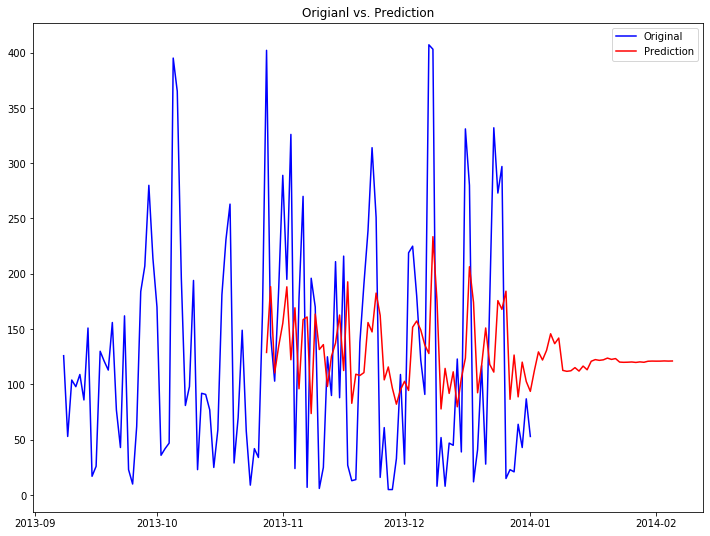

In [53]:
predict_ARMA = result.predict(start = 300, end = 400)

plt.figure(figsize=(12,9))
orig = plt.plot(data_13['PM_US Post'][250:], color='blue', label='Original')
pred = plt.plot(predict_ARMA, color='red', label='Prediction' )
plt.legend(loc='best')
plt.title('Origianl vs. Prediction')
plt.show(block=False)  